<a href="https://colab.research.google.com/github/rajendranast012-stack/in-silico-lab1/blob/main/K_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 41.0 MB/s eta 0:00:00


k=2, silhouette score=0.2781
k=3, silhouette score=0.3162
k=4, silhouette score=0.2659
k=5, silhouette score=0.2762
k=6, silhouette score=0.2665
k=7, silhouette score=0.2777
k=8, silhouette score=0.2410
k=9, silhouette score=0.2577
k=10, silhouette score=0.2627


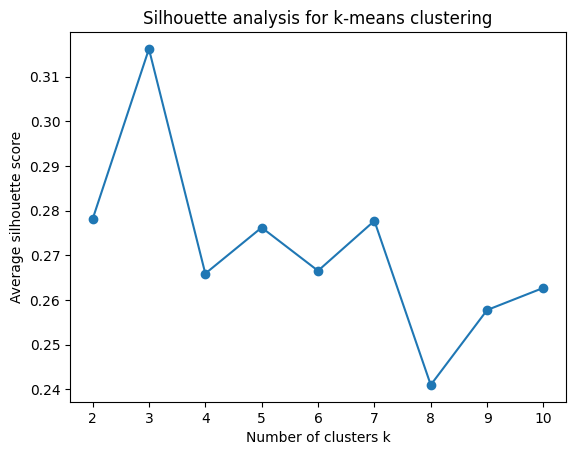

In [4]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Step 1: Load your SMILES ---
df = pd.read_excel('/content/name.xlsx') # adjust path
smiles_list = df['SMILES'].tolist()  # replace 'SMILES' with your column name

# --- Step 2: Generate MACCS fingerprints ---
fps = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        fp = MACCSkeys.GenMACCSKeys(mol)
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        fps.append(arr)
fps = np.array(fps)

# --- Step 3: Run K-means and compute silhouette scores ---
sil_scores = []
K_range = range(2, 11)  # try k = 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(fps)
    score = silhouette_score(fps, labels)
    sil_scores.append(score)
    print(f"k={k}, silhouette score={score:.4f}")

# --- Step 4: Plot silhouette vs k ---
import matplotlib.pyplot as plt

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Average silhouette score')
plt.title('Silhouette analysis for k-means clustering')
plt.show()


In [5]:
best_score = max(sil_scores)
best_k = K_range[sil_scores.index(best_score)]
print(f"\nBest k by silhouette score: {best_k}, score={best_score:.4f}")


Best k by silhouette score: 3, score=0.3162


Valid molecules: 187 / 187
Best k by silhouette: 3, score=0.3162


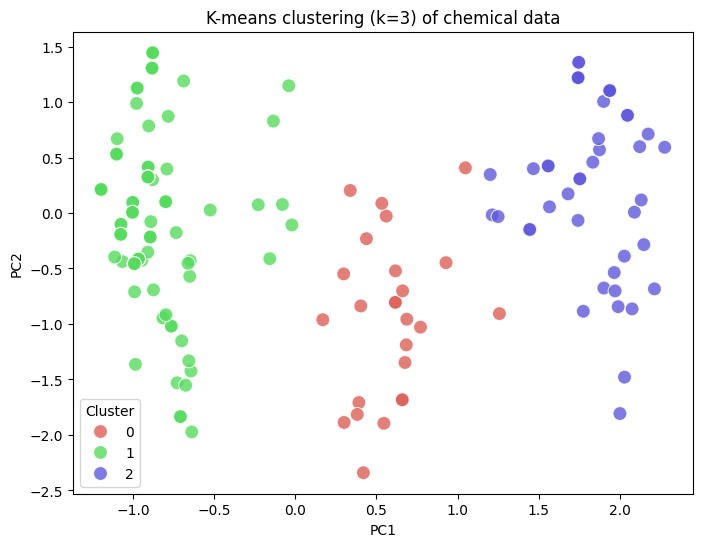

In [7]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load SMILES ---
df = pd.read_excel('/content/name.xlsx') # adjust path
smiles_list = df['SMILES'].tolist()  # replace 'SMILES' with your column name


# --- Step 2: Generate MACCS fingerprints ---
fps = []
valid_indices = []
for i, smi in enumerate(smiles_list):
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        fp = MACCSkeys.GenMACCSKeys(mol)
        arr = np.zeros((fp.GetNumBits(),), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fps.append(arr)
        valid_indices.append(i)

fps = np.array(fps)
print(f"Valid molecules: {len(fps)} / {len(smiles_list)}")

# --- Step 3: Determine best k using silhouette score ---
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(fps)
    score = silhouette_score(fps, labels)
    sil_scores.append(score)

best_score = max(sil_scores)
best_k = K_range[sil_scores.index(best_score)]
print(f"Best k by silhouette: {best_k}, score={best_score:.4f}")

# --- Step 4: Fit KMeans with best k ---
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_best.fit_predict(fps)

# Assign cluster labels to dataframe
df_valid = df.iloc[valid_indices].copy()
df_valid['Cluster'] = cluster_labels

# --- Step 5: Reduce dimensions to 2D for plotting ---
pca = PCA(n_components=2, random_state=42)
fps_2d = pca.fit_transform(fps)

# --- Step 6: Plot clusters ---
plt.figure(figsize=(8,6))
palette = sns.color_palette("hls", best_k)
sns.scatterplot(x=fps_2d[:,0], y=fps_2d[:,1], hue=df_valid['Cluster'], palette=palette, s=100, alpha=0.8)
plt.title(f"K-means clustering (k={best_k}) of chemical data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()
